In [123]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [124]:
onecall = True  # 8 days
#onecall = False # 5 days

In [125]:

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(base_url).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [126]:

API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
lat, lon = get_location()
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '8 days'
# request data
try:
    print('Requesting json data')
    onecall_data = requests.get(base_url).json()
    #print(onecall_data)
except:
    exit()

Requesting json data


In [127]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = onecall_data['daily']
l = len(df[0])


Creating dataframe:  8 days


In [128]:
_8days = pd.DataFrame.from_records(df)
print('Converting timestamp to human date')
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)            
_8days

Converting timestamp to human date


,dt,sunrise,sunset,moonrise,moonset,moon_phase,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,weather,clouds,pop,uvi,rain
0,26/08,06:59,20:45,23:42,15:56,0.75,"{'day': 23.13, 'min': 11.7, 'max': 25.83, 'nig...","{'day': 22.41, 'night': 20.71, 'eve': 24.5, 'm...",1023,35,6.84,1.98,228,5.91,"[{'id': 800, 'main': 'Clear', 'description': '...",5,0.00,4.99,NaN
1,27/08,07:00,20:43,01:00,17:11,0.79,"{'day': 25, 'min': 17.45, 'max': 27.91, 'night...","{'day': 24.47, 'night': 22.56, 'eve': 26.55, '...",1019,35,8.27,2.99,92,5.58,"[{'id': 803, 'main': 'Clouds', 'description': ...",81,0.00,5.90,NaN
2,28/08,07:02,20:41,00:26,18:12,0.82,"{'day': 27.97, 'min': 18.86, 'max': 31.88, 'ni...","{'day': 27.64, 'night': 26.63, 'eve': 29.66, '...",1014,40,12.87,2.69,203,4.25,"[{'id': 802, 'main': 'Clouds', 'description': ...",41,0.00,5.88,NaN
3,29/08,07:03,20:39,01:24,18:59,0.85,"{'day': 23.57, 'min': 20.42, 'max': 27.82, 'ni...","{'day': 23.39, 'night': 22.98, 'eve': 26.82, '...",1018,54,13.69,3.49,19,6.52,"[{'id': 500, 'main': 'Rain', 'description': 'l...",92,0.41,4.50,0.92
4,30/08,07:05,20:37,02:31,19:34,0.88,"{'day': 27.82, 'min': 18.84, 'max': 29.65, 'ni...","{'day': 27.71, 'night': 22.47, 'eve': 27.76, '...",1017,43,13.98,3.30,22,7.19,"[{'id': 500, 'main': 'Rain', 'description': 'l...",79,1.00,4.94,1.83
5,31/08,07:06,20:35,03:45,19:59,0.92,"{'day': 25.13, 'min': 18.87, 'max': 25.45, 'ni...","{'day': 25.21, 'night': 21.07, 'eve': 23.78, '...",1019,58,16.15,4.32,55,8.83,"[{'id': 500, 'main': 'Rain', 'description': 'l...",99,1.00,5.00,1.71
6,01/09,07:07,20:33,04:58,20:17,0.95,"{'day': 20.85, 'min': 16.39, 'max': 21.04, 'ni...","{'day': 20.66, 'night': 19.13, 'eve': 20.18, '...",1017,64,13.61,4.22,32,10.65,"[{'id': 804, 'main': 'Clouds', 'description': ...",98,0.00,5.00,NaN
7,02/09,07:09,20:31,06:10,20:32,0.98,"{'day': 23.69, 'min': 14.97, 'max': 25.13, 'ni...","{'day': 23.11, 'night': 17.97, 'eve': 19.49, '...",1016,38,8.44,4.42,71,10.71,"[{'id': 801, 'main': 'Clouds', 'description': ...",23,0.00,5.00,NaN


In [129]:
_8days.keys(), len(_8days.keys())

(Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'temp',
        'feels_like', 'pressure', 'humidity', 'dew_point', 'wind_speed',
        'wind_deg', 'wind_gust', 'weather', 'clouds', 'pop', 'uvi', 'rain'],
       dtype='object'),
 19)

In [130]:

print('Selecting columns')
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:l]
focus_idx = _8days.keys()[focus]

status2 = pd.DataFrame(_8days[focus_idx])
demain = status2.loc[1]

demain

Selecting columns


dt            27/08
sunrise       07:00
sunset        20:43
moonrise      01:00
moonset       17:11
moon_phase     0.79
pressure       1019
humidity         35
dew_point      8.27
wind_speed     2.99
wind_deg         92
wind_gust      5.58
pop             0.0
uvi             5.9
Name: 1, dtype: object

In [131]:
focus

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 16, 17])

In [132]:
# zip and save
print('Save to CSV')
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv')
#pprint(onecall_data)
print(_8days.iloc[0])  # today


Save to CSV
dt                                                        26/08
sunrise                                                   06:59
sunset                                                    20:45
moonrise                                                  23:42
moonset                                                   15:56
moon_phase                                                 0.75
temp          {'day': 23.13, 'min': 11.7, 'max': 25.83, 'nig...
feels_like    {'day': 22.41, 'night': 20.71, 'eve': 24.5, 'm...
pressure                                                   1023
humidity                                                     35
dew_point                                                  6.84
wind_speed                                                 1.98
wind_deg                                                    228
wind_gust                                                  5.91
weather       [{'id': 800, 'main': 'Clear', 'description': '...
clouds                      

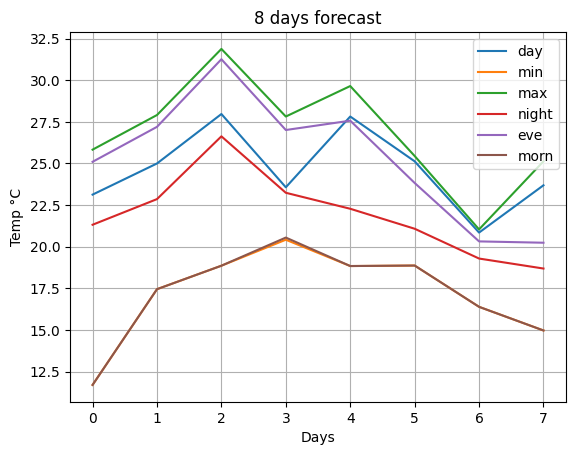

In [133]:
# plot temperature
l = []
for i in range(0,8):
    l.append(_8days.iloc[i].temp)

df = pd.DataFrame(l)
df.plot()
plt.title('8 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('Days')
plt.grid()
plt.show()

   
# 5 days forecast


In [134]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(base_url).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1724652000, 'main': {'temp': 11.7, 'feels_like': 11.2, 'temp_min': 11.7, 'temp_max': 15.97, 'pressure': 1023, 'sea_level': 1023, 'grnd_level': 1013, 'humidity': 87, 'temp_kf': -4.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'clouds': {'all': 0}, 'wind': {'speed': 1.61, 'deg': 228, 'gust': 3.38}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-26 06:00:00'}, {'dt': 1724662800, 'main': {'temp': 14.59, 'feels_like': 13.98, 'temp_min': 14.59, 'temp_max': 20.37, 'pressure': 1023, 'sea_level': 1023, 'grnd_level': 1014, 'humidity': 72, 'temp_kf': -5.78}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'clouds': {'all': 3}, 'wind': {'speed': 1.83, 'deg': 239, 'gust': 2.82}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-26 09:00:00'}, {'dt': 1724673600, 'main': {'temp': 20.07, 'feels_like'

In [135]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1724652000
main          {'temp': 11.7, 'feels_like': 11.2, 'temp_min':...
weather       [{'id': 800, 'main': 'Clear', 'description': '...
clouds                                               {'all': 0}
wind                  {'speed': 1.61, 'deg': 228, 'gust': 3.38}
visibility                                                10000
pop                                                         0.0
sys                                                {'pod': 'd'}
dt_txt                                      2024-08-26 06:00:00
rain                                                        NaN
Name: 0, dtype: object


In [136]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys',
       'dt_txt', 'rain'],
      dtype='object')

In [137]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   26/08 08:00  08:00     15.97     11.70
1   26/08 11:00  11:00     20.37     14.59
2   26/08 14:00  14:00     24.26     20.07
3   26/08 17:00  17:00     25.83     25.83
4   26/08 20:00  20:00     24.52     24.52
5   26/08 23:00  23:00     21.32     21.32
6   27/08 02:00  02:00     19.40     19.40
7   27/08 05:00  05:00     18.18     18.18
8   27/08 08:00  08:00     17.61     17.61
9   27/08 11:00  11:00     21.55     21.55
10  27/08 14:00  14:00     26.28     26.28
11  27/08 17:00  17:00     27.91     27.91
12  27/08 20:00  20:00     26.30     26.30
13  27/08 23:00  23:00     22.86     22.86
14  28/08 02:00  02:00     20.97     20.97
15  28/08 05:00  05:00     19.57     19.57
16  28/08 08:00  08:00     19.14     19.14
17  28/08 11:00  11:00     24.37     24.37
18  28/08 14:00  14:00     29.26     29.26
19  28/08 17:00  17:00     31.66     31.66
20  28/08 20:00  20:00     29.89     29.89
21  28/08 23:00  23:00     26.63     26.63
22  29/08 0

In [138]:
_5days['human_date']

0     26/08 08:00
1     26/08 11:00
2     26/08 14:00
3     26/08 17:00
4     26/08 20:00
5     26/08 23:00
6     27/08 02:00
7     27/08 05:00
8     27/08 08:00
9     27/08 11:00
10    27/08 14:00
11    27/08 17:00
12    27/08 20:00
13    27/08 23:00
14    28/08 02:00
15    28/08 05:00
16    28/08 08:00
17    28/08 11:00
18    28/08 14:00
19    28/08 17:00
20    28/08 20:00
21    28/08 23:00
22    29/08 02:00
23    29/08 05:00
24    29/08 08:00
25    29/08 11:00
26    29/08 14:00
27    29/08 17:00
28    29/08 20:00
29    29/08 23:00
30    30/08 02:00
31    30/08 05:00
32    30/08 08:00
33    30/08 11:00
34    30/08 14:00
35    30/08 17:00
36    30/08 20:00
37    30/08 23:00
38    31/08 02:00
39    31/08 05:00
Name: human_date, dtype: object

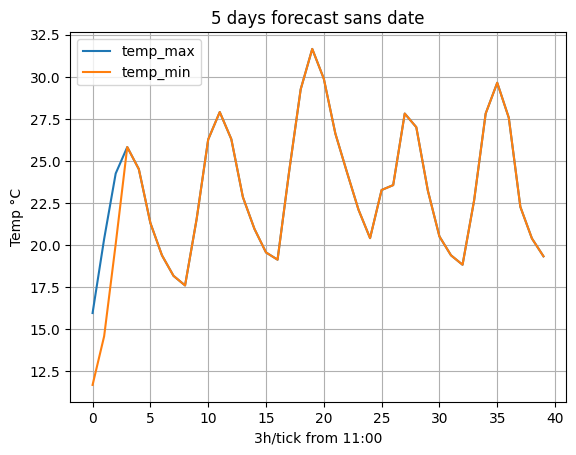

In [139]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast sans date')
plt.ylabel('Temp °C')
plt.xlabel('3h/tick from 11:00')
plt.grid()
plt.show()
    

In [140]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

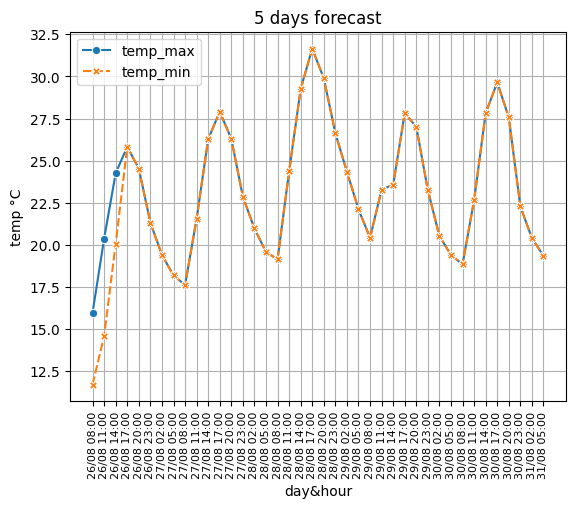

In [141]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df1 = df1.set_index('human_date')
df1
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

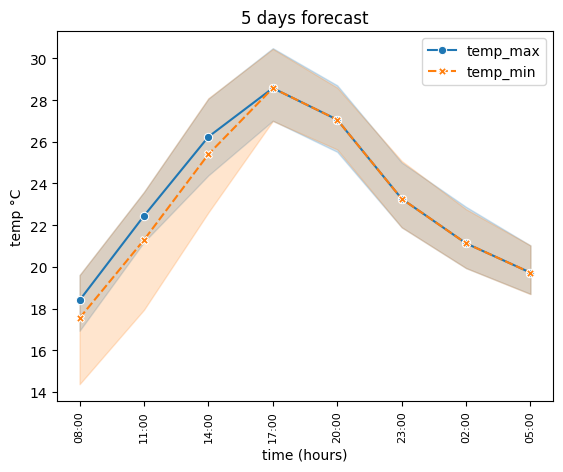

In [142]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 